# Assignment 3

- In this assignment, you will
    - 1) implement a Long Short-term Memory (LSTM)
    - 2) and fine tune a Language Model
- You have to submit your code for Problem 1 as ``Assingment3_{your_student_id}.py``
- For the Problem 2, you have to submit a report in pdf and txt file of your training 
    - Explain why you chose the specific corpus
    - Submit some of the interesting examples you made with the fine-tuned model

In [7]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt


In [ ]:
# Download Assignment3.py 
!wget https://raw.githubusercontent.com/jdasam/aat3020/main/NLP_Assignment_3.py

## Problem 1: Implement an LSTM cell (15 pts)
- with only ``nn.Linear``, ``nn.Parameter``, ``torch.sigmoid``, and ``torch.tanh``
- The forward propagation of LSTM cell can be represented as below
    - $i_t = \sigma_g(W_ix_t+U_ih_{t-1}+b_i)$
    - $f_t = \sigma_g(W_fx_t+U_fh_{t-1}+b_f) $
    - $\tilde{c}_t = \sigma_c(W_cx_t+U_ch_{t-1}+b_c)$
    - $o_t = \sigma_g(W_ox_t+U_oh_{t-1}+b_o)$
    - $c_t = f_t \otimes c_{t-1} + i_t\otimes \tilde{c}_t$
    - $h_t = o_t \otimes \sigma_c(c_t)$
    - $\sigma_g$: sigmoid function. use ``torch.sigmoid()`` or ``atensor.sigmoid()``
    - $\sigma_c$: hyperbolic tangent function. use ``torch.tanh()`` or ``atensor.tanh()``
    - $\otimes$ represents Hadamard product (element-wise product)
        - It means that even though you are multiplying two matrices, you don't multiply as a "matrix multiplication" but as a simple multiplication between each element of two matrices in a same position
        - This can be represetned as a simple multiplication like ``atensor * another_tensor`` in ``torch``
- where the each variable can be explained as below:
    - $x_t\in\mathbb{R}^d$: input vector to the LSTM unit
    - $h_t\in(-1,1)^h$: hidden state vector also known as output vector of the LSTM unit
    - $c_t \in \mathbb{R}^h$: cell state vector
    - $W\in\mathbb{R}^{h\times d}, U\in\mathbb{R}^{h\times h}$, and $b\in\mathbb{R}^h$: weight matrices and bias vector parameters which need to be learned during training
    - $i_t\in(0,1)^h$: input/update gate's activation vector. $h$ represents size of hidden states
    - $f_t\in(0,1)^h$: forget gate's activation vector
    - $\tilde{c}_t\in(-1,1)^h$: cell input activation vector
    - $o_t\in(0,1)^h$: output gate's activation vector


- You can implement LSTM with 8 ``nn.Linear`` modules, to strictly follow the equations above. But to easily compare your implementation with PyTorch's official LSTM implementation, I recommend you to implement it with only two ``nn.Linear`` modules with each of it has a ``bias=True``
    - If you carefully look at the equation, you can find you only need one bias, but torch's official implementation uses two biases to match CuDNN compatibility

- Hint:
    - $Wx+b$ can be implemented by 
        - ``layer = nn.Linear(in_features=x.shape[-1], out_features=W.shape[0], bias=True)``
        - ``out = layer(x)``
    - ``bias_1 + bias_2`` can be regarded as a single bias ``bias_12=bias_1+bias2``
        - So it is okay to use two ``nn.Linear`` modules with ``bias=True``
        
        

In [ ]:
class MyLSTM(nn.Module):
  def __init__(self, input_size: int, hidden_size: int):
    super().__init__()
    '''
    TODO: Define Weights and Bias of a single-layer, uni-directional LSTM
    
    Arguments
      input_size (int): Num dimension of input x. It is represented as `d` in the equations in the explanation part
      hidden_size (int): Num dimension of output h. It is represented as `h` in the equations in the explanation part
    
    Module Definition
      self.weight_ih (nn.Linear): Linear layer that combines Weight matrix [W_i | W_f | W_c | W_o] and bias b
      self.weight_hh (nn.Linear): Linear layer that combines Weight matrix [U_i | U_f | U_c | U_o] and bias b
    
    Implementation Condition: To compare your implementation with the torch's official implementation, please strictly follow the explanation above
    '''
    
    self.weight_ih = nn.Linear(in_features=1, out_features=1, bias=True) # TODO: complete this layer by selecting proper in_features and out_features
    self.weight_hh = nn.Linear(in_features=1, out_features=1, bias=True) # TODO: complete this layer by selecting proper in_features and out_features
    self.hidden_size = hidden_size

  def _cal_single_step(self, x_t:torch.Tensor, last_hidden:torch.Tensor, last_cell:torch.Tensor):
    '''
    Argument:
      x_t : input of timestep t. Has a shape of [Num_Batch, Num_input_dim]
      last_hidden: hidden state of timestep (t-1). Has a shape of [Num_Batch, Num_hidden_dim]
      last_cell: cell state of timestep (t-1). Has a shape of [Num_batch, Num_hidden_dim]
      
    Output:
      updated_hidden (torch.Tensor): hidden state of timestep t. Has a shape of [Num_Batch, Num_hidden_dim]
      updated_cell (torch.Tensor): cell state of timestep t. Has a shape of [Num_Batch, Num_hidden_dim]
      
    TODO: Complete this function using the input arguments and self.weight_ih, self.weight_hh
    
    '''

    
    return updated_hidden, updated_cell
  
  def forward(self, x:torch.Tensor, hidden_and_cell_state:tuple=None):
    '''
    Argument:
      x (torch.Tensor): Input sequence. Has a shape of [Num_Batch, Num_Timestep, Num_input_dim
      hidden_and_cell_state (optional, tuple): Hidden state and Cell state of last timestep.
      
    Return:
      output, (last_hidden, last_cell)
      Be carefule that you have to return two variables, where the second variable is a tuple of two tensors.
      
      output (torch.Tensor): Output of LSTM that has a shape of [Batch_Size, Num_Time_Steps, Hidden_State_Size]
                             It is the concatenation of output hidden states of every given time steps
      last_hidden (torch.Tensor): The hidden state of LSTM after calculating entire time steps. 
      last_cell (torch.Tensor): LSTM has two types of hidden states, and one is called "cell state". 
      
    
    TODO: Implement this using a for loop and `self._cal_single_step`.
    '''
    
    # Leave the code below as it is
    if hidden_and_cell_state is not None and isinstance(hidden_and_cell_state, tuple):
      last_hidden = hidden_and_cell_state[0]
      last_cell = hidden_and_cell_state[1]
    else:
      last_hidden = torch.zeros([x.shape[0], self.hidden_size])
      last_cell = torch.zeros([x.shape[0], self.hidden_size])
    
    '''
    Write your code from here
    '''
    
    return output, (last_hidden, last_cell)

  
input_size = 16
hidden_size = 32

model = MyLSTM(input_size, hidden_size)

In [ ]:
'''
Simple test case 
'''

input_size = 16
hidden_size = 32

model = MyLSTM(input_size, hidden_size)

dummy_batch_size = 8
dummy_time_steps = 20
dummy_input = torch.randn([dummy_batch_size, dummy_time_steps, input_size])

output, (last_hidden_state, last_cell_state) = model(dummy_input)

assert output.shape[0] == dummy_batch_size, "0th dimension of output has to be the batch size"
assert output.shape[1] == dummy_time_steps, "1st dimension of output has to be the time steps"
assert output.shape[2] == hidden_size, "2nd dimension of output has to be the hidden_size"



In [ ]:
'''
Your LSTM model has to return same output for the script below 
'''

# Without for loop
total_output, (last_hidden_state, last_cell_state) = model(dummy_input)

hidden_and_cell_state = (torch.zeros([dummy_batch_size, hidden_size]), torch.zeros([dummy_batch_size, hidden_size]))
for i in range(dummy_time_steps):
  time_step_output, hidden_and_cell_state = model(dummy_input[:,i:i+1], hidden_and_cell_state)
  
assert (total_output[:,-1:] == time_step_output).all(), 'The LSTM output has to be equal for sliced input using for-loop'

In [ ]:
'''
The script below tests whether your implementation returns same output with PyTorch's official LSTM implementation

To pass this test, you have to make sure that you are using the weight of `self.weight_hh` and `self.weight_ih` as the same order
with the official PyTorch LSTM

Be careful on the order of W_i, W_f, W_c, W_o in the combined weight matrix, when you declare your LSTM's forward propagation!

self.weight_ih (nn.Linear): Linear layer that combines Weight matrix [W_i | W_f | W_c | W_o] and bias b
self.weight_hh (nn.Linear): Linear layer that combines Weight matrix [U_i | U_f | U_c | U_o] and bias b
'''


lstm_pre_impl = nn.LSTM(input_size, hidden_size, batch_first=True)

lstm_pre_impl.weight_hh_l0.data = model.weight_hh.weight.data
lstm_pre_impl.bias_hh_l0.data = model.weight_hh.bias.data

lstm_pre_impl.weight_ih_l0.data = model.weight_ih.weight.data
lstm_pre_impl.bias_ih_l0.data = model.weight_ih.bias.data


output, (last_hidden_state, last_cell_state) = model(dummy_input)
output_compare, (last_hidden_state_compare, last_cell_state_compare) = lstm_pre_impl(dummy_input)

assert torch.allclose(output, output_compare, atol=1e-6), "The output of LSTM is different"
assert torch.allclose(last_hidden_state, last_hidden_state_compare, atol=1e-6), "The last hidden state of LSTM is different"
assert torch.allclose(last_cell_state, last_cell_state_compare, atol=1e-6), "The last cell state of LSTM is different"

print("Test passed! Your LSTM implementation returns the exactly same result for PyTorch's official implementation of single-layer uni-directiona LSTM")

### Copy and Paste your code to Assignment3.py
- Run the code below to check if your implementation is correct

In [ ]:
!python3 Assignment3.py

## Problem 2: Fine tune Language model and generate texts (25 pts)
- In this problem, we will use ``transformers`` from Hugging Face
    - You can download a tokenizer and a pre-trained model from Hugging Face
    

In [1]:
!pip install transformers==4.18.0

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
     |████████████████████████████████| 4.0 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 897 kB 13.8 MB/s eta 0:00:01


In [2]:
'''
This will take some minutes to download the model
'''

from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilgpt2")

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

## Problem 2-1: Fine-tune the pre-trained Model with your text
- The model you just downloaded is pre-trained with huge corpus using GPUs heavily
- You can exploit this model for your purpose by fine-tuning the model with a small dataset

- **You have to prepare your own `txt` file to use as as a training corpus**
    - In your report, describe why you chose this text as a training file
        - What did you expect for a model that is fine-tuned with this specific text file?

- ``TextSet`` helps to batchify a given corpus of `txt` file
    - To fit a corpus into ``TextSet``, you have to put text into a single txt file
    - Every line breeak will be replaced with a blank space

In [ ]:
def read_txt(txt_path):
  with open(txt_path, 'r') as f:
    txt_string = f.readlines()
  return txt_string

class TextSet:
  def __init__(self, txt_path, tokenizer, batch_len=256):
    corpus_string = read_txt(txt_path)
    self.text_in_a_string = "".join(corpus_string).replace('\n', ' ')
    
    self.tokenizer = tokenizer
    self.tokenized_corpus = self.tokenizer(self.text_in_a_string)['input_ids']
    self.batch_len = batch_len
    
    self.tokenized_corpus = self.tokenized_corpus[:len(self.tokenized_corpus)//self.batch_len*self.batch_len]
    self.corpus_tensor = self._batchify_text()
    
  def _batchify_text(self):
    entire_corpus_tensor = torch.LongTensor(self.tokenized_corpus)
    return entire_corpus_tensor.reshape(-1, self.batch_len)
    
  def __len__(self):
    return len(self.corpus_tensor)

  def __getitem__(self, idx):
    return self.corpus_tensor[idx]

'''
TODO: select your own txt path
'''

your_txt_path = "test.txt" # select your own txt path
train_set = TextSet(your_txt_path, tokenizer, batch_len=256)

# The code below will show how the tokenizer convert and reconvert the given text
train_set[0], train_set.tokenizer.decode(train_set[0])

In [10]:
'''
define train_loader
'''

from torch.utils.data import DataLoader
train_set = TextSet(your_txt_path, tokenizer, batch_len=256)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)


- In your report, briefly explain how this code trains a language model

100%|██████████| 10/10 [01:12<00:00,  7.24s/it]


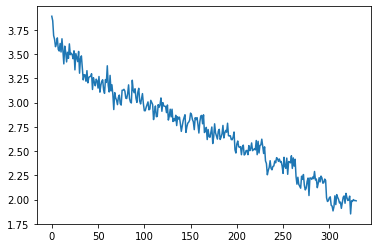

In [11]:
from tqdm import tqdm

'''
Use CUDA (NVIDIA GPU) to train your model
'''

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_record = []
model.cuda()
num_epochs = 10

'''
In your report, briefly explain how this training loop trains a language model 
'''
for epoch in tqdm(range(num_epochs)):
  for batch in train_loader:
    out = model(batch.cuda()).logits
    out = torch.log_softmax(out, dim=-1)
    correct_next_word = batch[:, 1:]
    out_flatten = out[:, :-1, :].reshape(-1, out.shape[-1])
    correct_next_word = correct_next_word.reshape(-1)

    log_prob_of_correct_word = out_flatten[torch.arange(len(correct_next_word)), correct_next_word]

    loss = -log_prob_of_correct_word.mean()
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    loss_record.append(loss.item())
    
plt.plot(loss_record)

### Problem 2-2: Generate Text with your fine-tuned Model
- Here, you have to generate text with the fine-tuned model
- You have to provide interesting prompt, that is given as a precedding sequence of token
- In your report, introduce interesting examples you have generated
    - Why those were interesting


In [12]:
'''
Declare generator using HuggingFace library
'''
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model=model, tokenizer=tokenizer, device=0)

In [14]:
'''
Generate sentences using your own prompt and your max legnth

'''

your_prompt = "Your father" # caution: Do not add blank space at the end of the prompt
your_max_length = 100
your_num_sequences = 5

generator(your_prompt, max_length=your_max_length, num_return_sequences=your_num_sequences)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Your father, and perhaps he too,' said Gandalf, 'if you look who you are. When you turn to Bilbo, you shall face many temptations, if he comes. And be careful of what you say.'      Bilbo kept Frodo safe for several days, and they remained in Bree-land. Nonetheless, he was a scoundrel. He began to tell oddballs, usually at once, although he now tended to Samwise (often by means"},
 {'generated_text': "Your father was dead. I would help you?'      'Pity, that's all he said.' Then he got up and walked away.      'Who are you?' he asked. 'Old Man Bill Ferny,' answered Merry. 'My cousin Aragorn Ferny, you know best. I used to ask him many questions for years. But when he came back he used to send me off. And that was _I am Baggins.'"},
 {'generated_text': "Your father's only concern, that is is simply the money.' He stopped, as if for good he was not sure. He was not angry.      'And tell me, Gandalf, how old you are?' he asked slowly.      'That is old Bilbo, when he 